<class 'pandas.core.frame.DataFrame'>
Index: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wind     6574 non-null   float64
 1   ind      6574 non-null   int64  
 2   rain     6574 non-null   float64
 3   ind.1    6574 non-null   float64
 4   t.max    6574 non-null   float64
 5   ind.2    6574 non-null   float64
 6   t.min    6574 non-null   float64
 7   t.min.g  6574 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 462.2+ KB


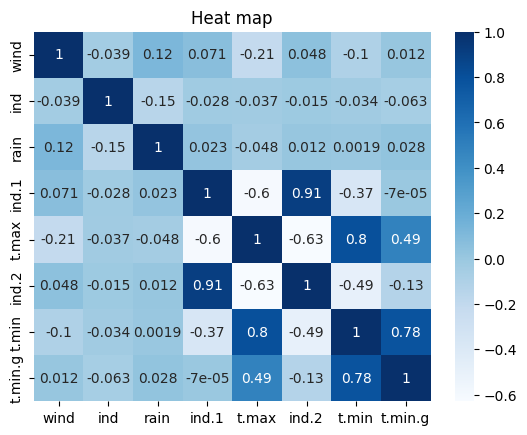

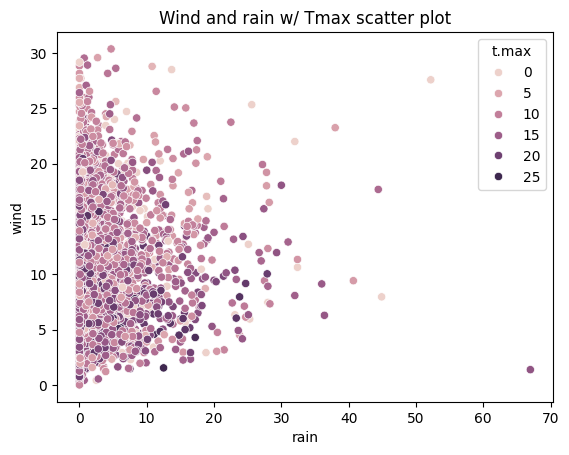

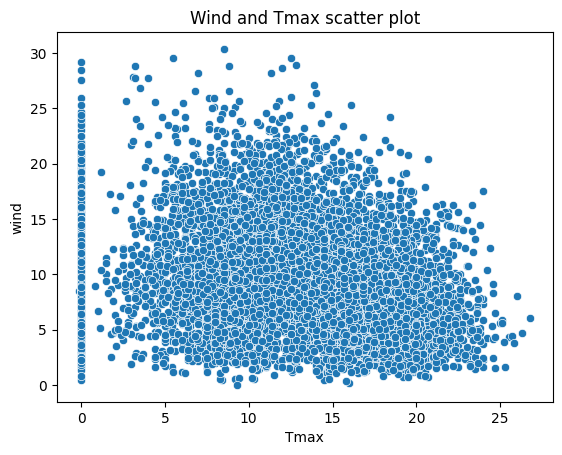

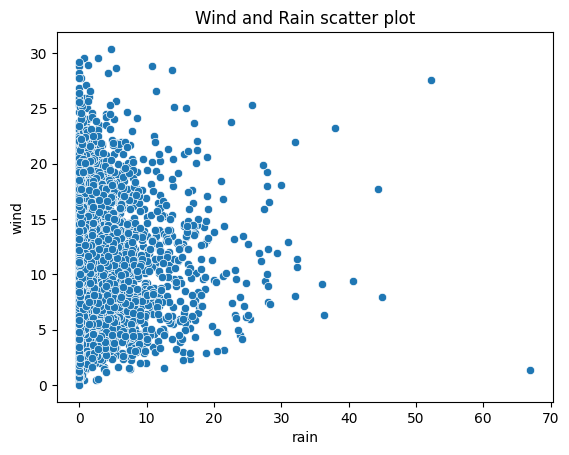

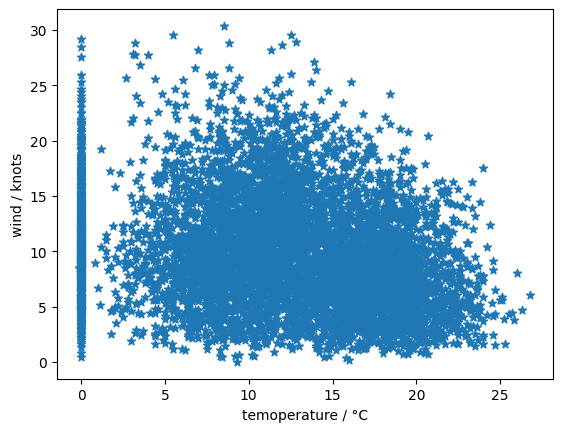

Learned function: power_consumption = temperature*-0.17 + 11.91
R^2 score: 0.04543931828191583


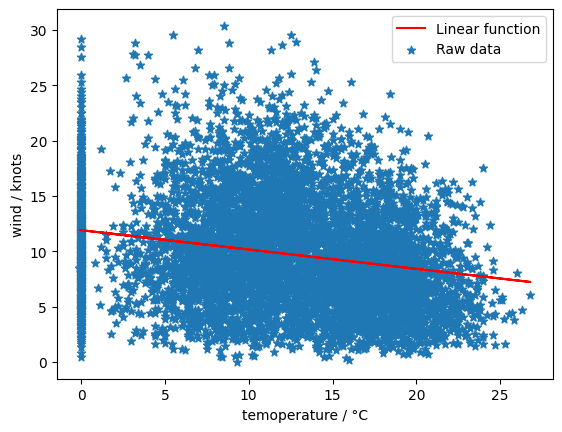

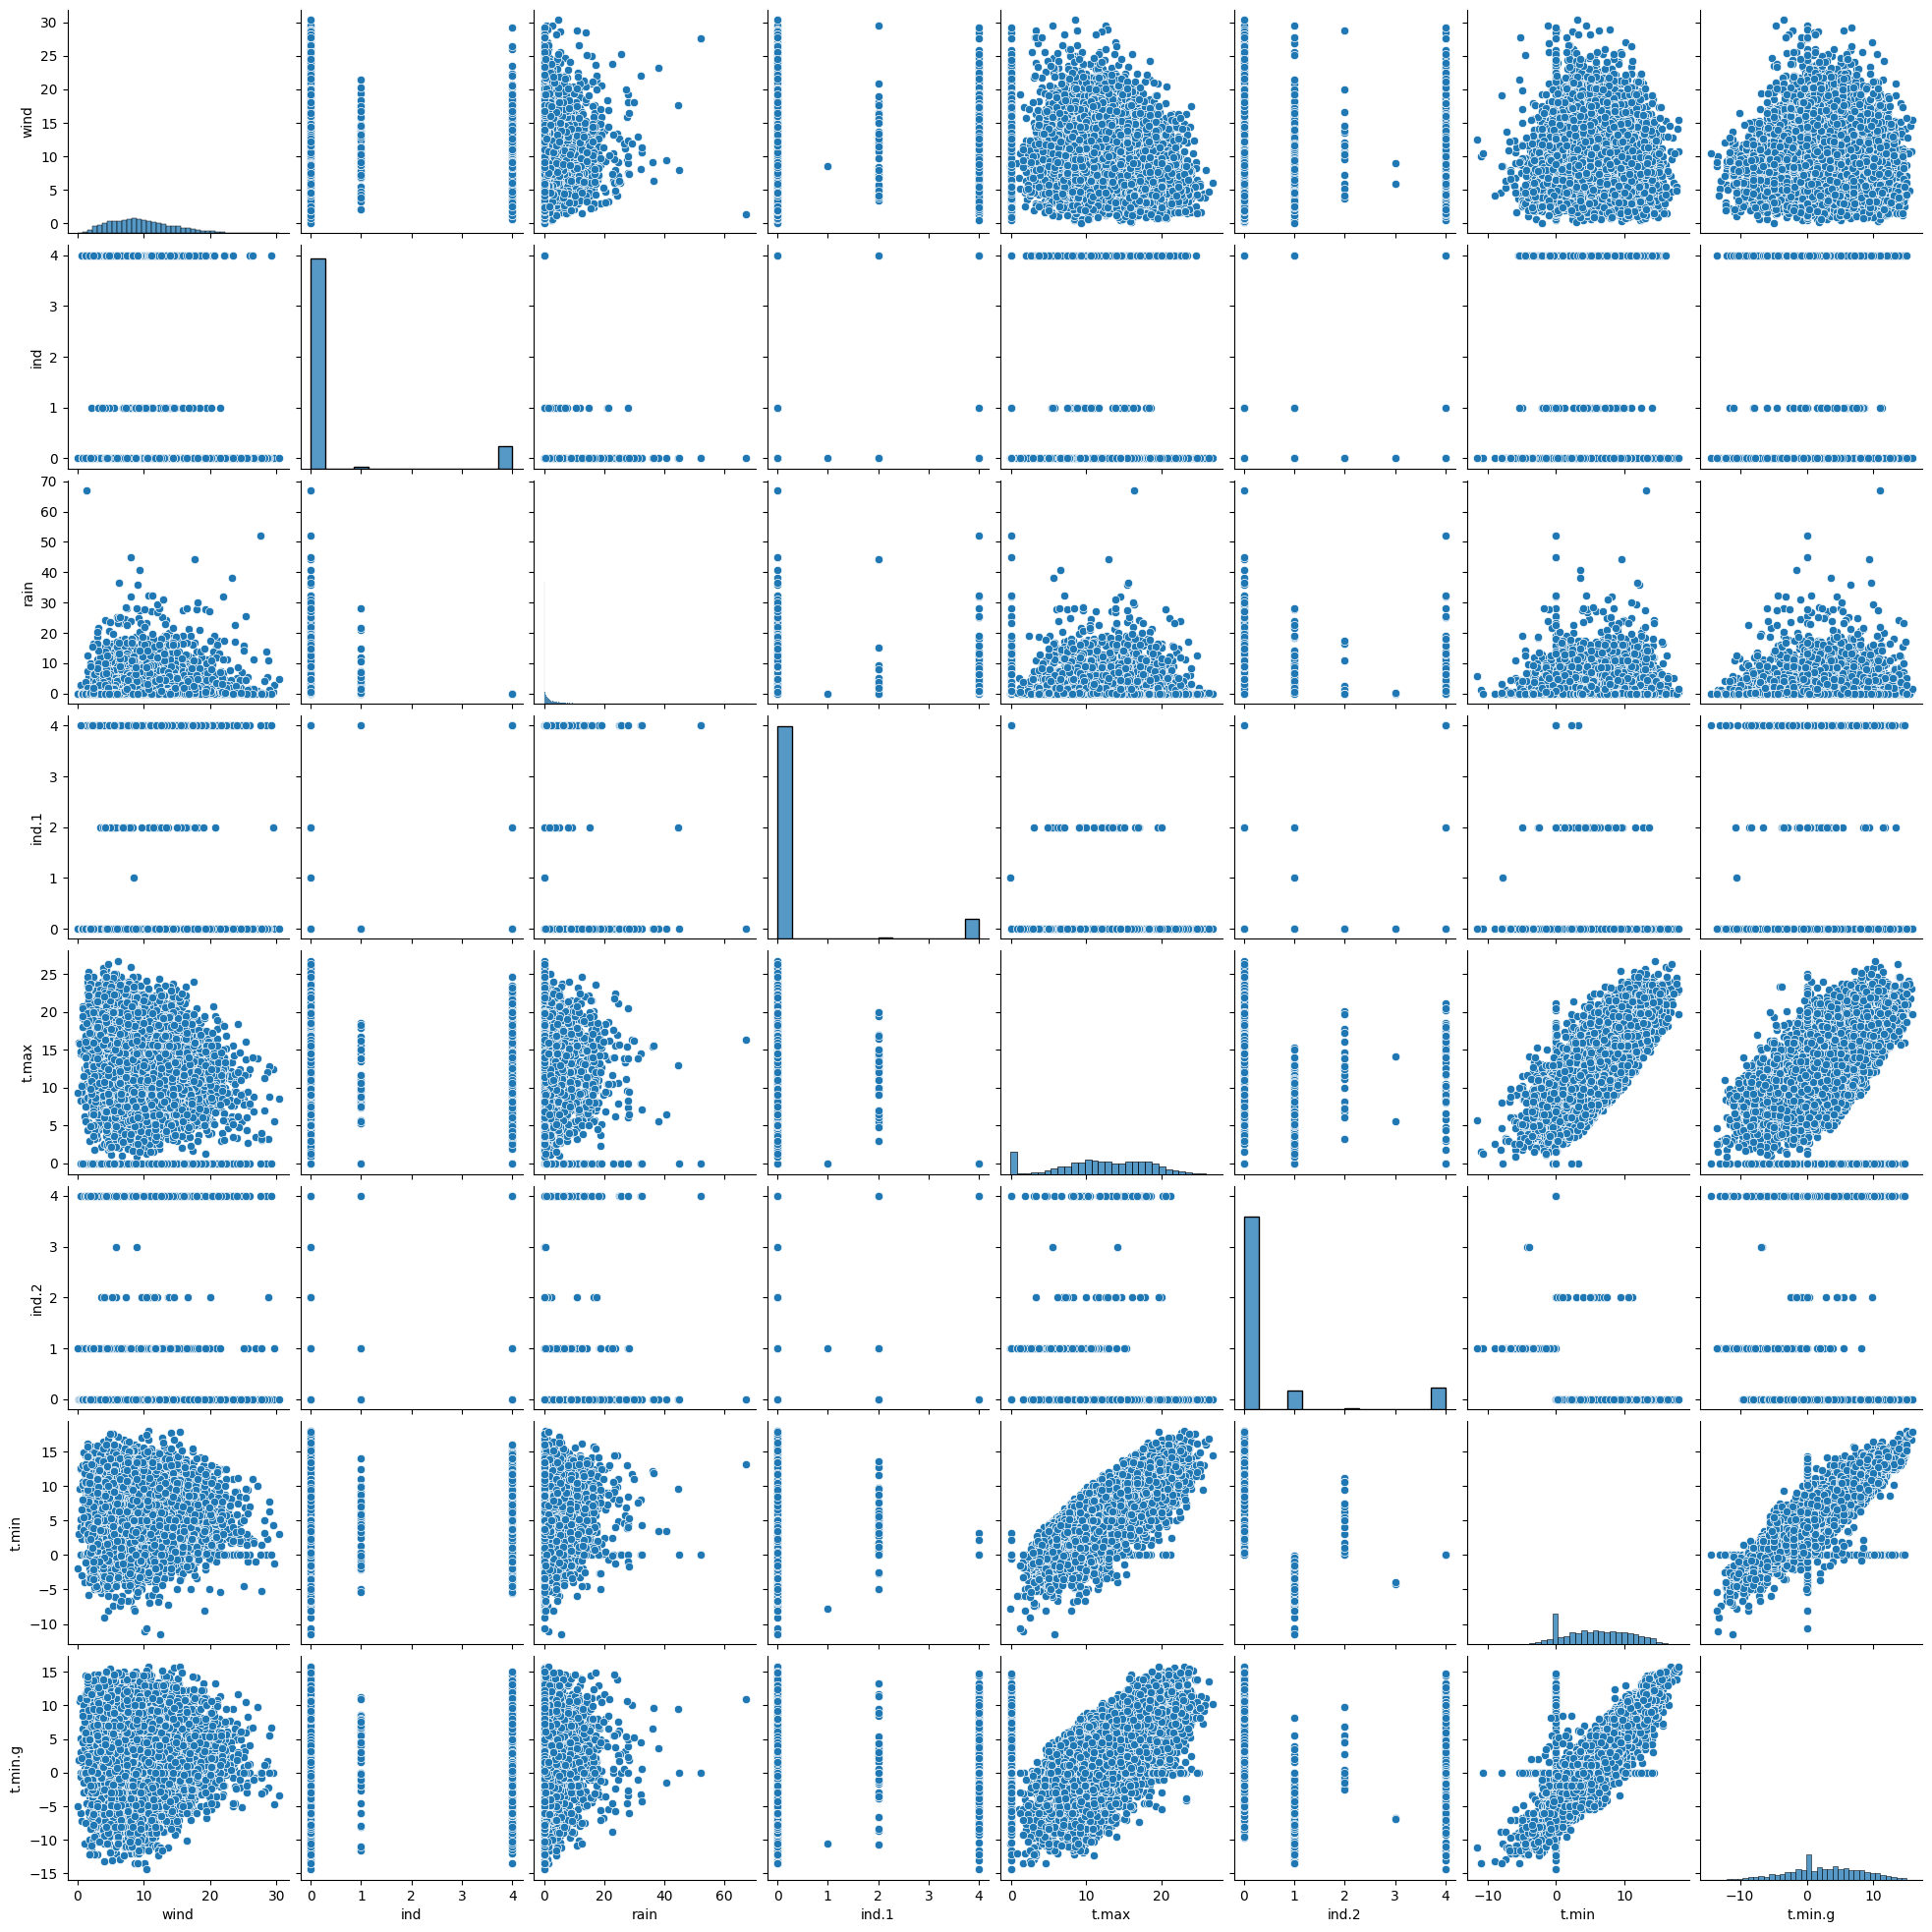

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("wind_dataset.csv")
# data.head()
data.columns = data.columns.str.strip().str.lower()
# data.head()
data.index = data['date']
data = data.drop(['date'], axis=1)
# data.head()
# data.info()
# data = data.dropna()
# data.isna().sum()
data.fillna(0, inplace=True)
# data.isna().sum()
data.info()

sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title('Heat map')
plt.show()

# wind has small positive relationship with rain and negative relationship with Tmax

sns.scatterplot(data=data, x='rain', y='wind', hue='t.max')
plt.xlabel('rain')
plt.ylabel('wind')
plt.title('Wind and rain w/ Tmax scatter plot')
plt.show()

sns.scatterplot(data=data, x='t.max', y='wind')
plt.xlabel('Tmax')
plt.ylabel('wind')
plt.title('Wind and Tmax scatter plot')
plt.show()

sns.scatterplot(data=data, x='rain', y='wind')
plt.xlabel('rain')
plt.ylabel('wind')
plt.title('Wind and Rain scatter plot')
plt.show()

# scatter figure and using linear regression to predict wind speed
plt.scatter(data['t.max'], data['wind'], marker='*')
plt.xlabel('temoperature / °C')
plt.ylabel('wind / knots')
plt.show()
X = np.expand_dims(np.array(data['t.max']), axis=1)
y = np.array(data['wind'])
reg = LinearRegression().fit(X, y)
print(f'Learned function: power_consumption = temperature*{reg.coef_[0]:.2f} + {reg.intercept_:.2f}')
print(f'R^2 score: {reg.score(X,y)}')
f = lambda x: x*reg.coef_[0] + reg.intercept_
plt.plot(data['t.max'], data['t.max'].apply(f), color='red', label='Linear function')
plt.scatter(data['t.max'], data['wind'], marker='*', label='Raw data')
plt.xlabel('temoperature / °C')
plt.ylabel('wind / knots')
plt.legend()
plt.show()

sns.pairplot(data)

LinearRegression
mean squared error: 22.05396295252656
mean absolute error: 3.748737638719434


Lasso
mean squared error: 25.020399659795157
mean absolute error: 4.021720674389802


Ridge
mean squared error: 22.05417347787967
mean absolute error: 3.7487905093006786


BayesianRidge
mean squared error: 22.05976546092399
mean absolute error: 3.750122429103166


DecisionTreeRegressor
mean squared error: 41.40043724949303
mean absolute error: 5.037650063371356


LinearSVR
mean squared error: 22.223617774558146
mean absolute error: 3.708201011556171


KNeighborsRegressor
mean squared error: 24.108564474524712
mean absolute error: 3.865565019011407




c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForestRegressor
mean squared error: 22.468313202761145
mean absolute error: 3.679676887431959




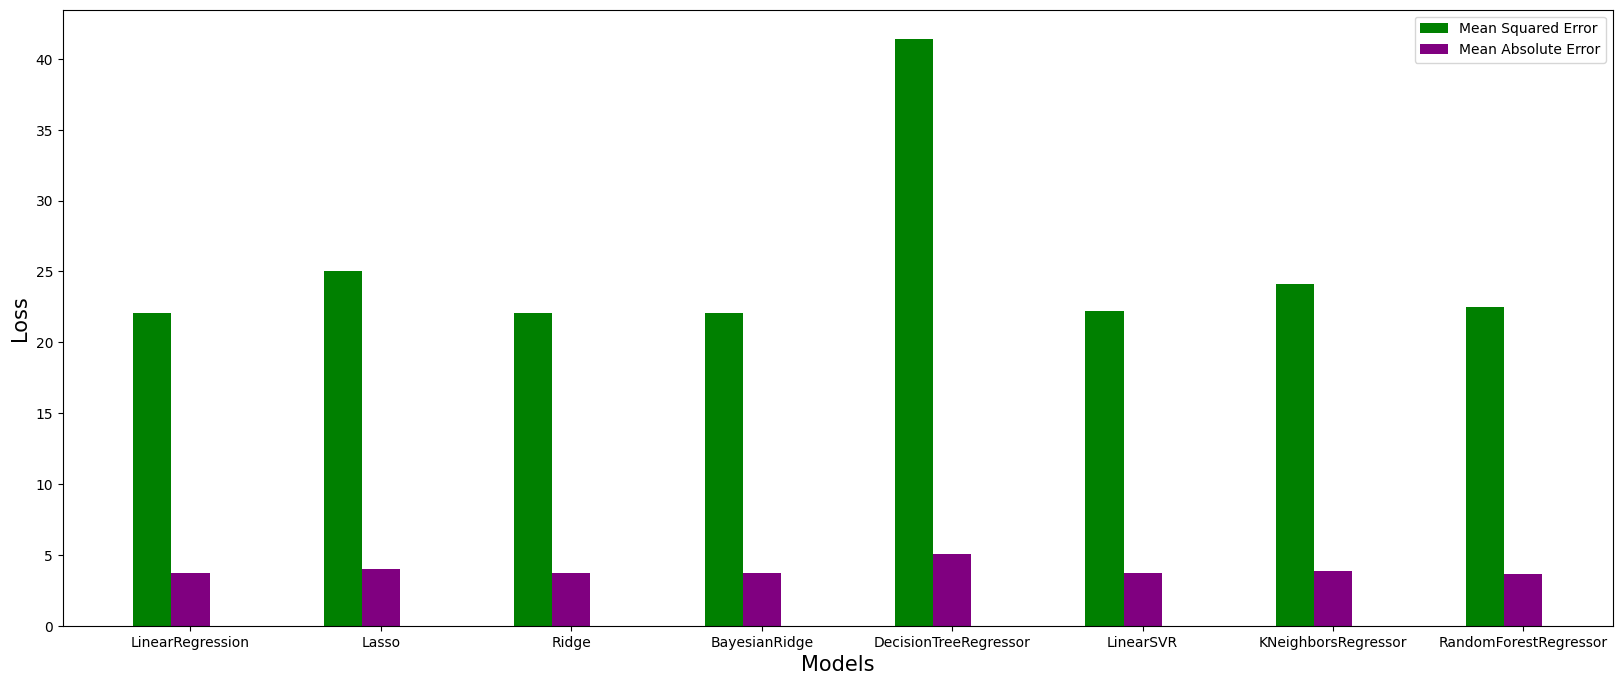

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("wind_dataset.csv")
# data.head()
data.columns = data.columns.str.strip().str.lower()
# data.head()
data.index = data['date']
data = data.drop(['date'], axis=1)
# data.head()
# data.info()
# data = data.dropna()
data.isna().sum()
data.fillna(0, inplace=True)
# data.isna().sum()
# data.info()

# standarization
std = StandardScaler()
# let X is all columns except wind, and y is wind
X = data.drop(columns=['wind'], axis=1)
y = data['wind']
X = std.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

msr = []
mar = []

models = [['LinearRegression', LinearRegression()], 
          ['Lasso', Lasso()], ['Ridge', Ridge()], 
          ['BayesianRidge', BayesianRidge()], 
          ['DecisionTreeRegressor', DecisionTreeRegressor()], 
          ['LinearSVR', LinearSVR()], 
          ['KNeighborsRegressor', KNeighborsRegressor()], 
          ['RandomForestRegressor', RandomForestRegressor()]
            ]

def model_training_and_score(name, model):
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    mean_sqr = mean_squared_error(y_test, y_prediction)
    mean_abr = mean_absolute_error(y_test, y_prediction)
    print(name)
    print('mean squared error:', mean_sqr)
    print('mean absolute error:', mean_abr)
    msr.append([name, mean_sqr])
    mar.append([name, mean_abr])
    print('\n')

for model in models:
    model_training_and_score(model[0], model[1])

barwidth = 0.2
model_names = []
mean_squared = []
mean_absolute = []
for i in mar:
    model_names.append(i[0])
    mean_absolute.append(i[1])
for i in msr:
    mean_squared.append(i[1])
fig = plt.subplots(figsize =(20, 8))
br1 = np.arange(len(mean_squared))
plt.bar(br1, mean_squared, color = 'green', width=barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, mean_absolute, color='purple', width=barwidth, label='Mean Absolute Error')
plt.xlabel("Models", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)

plt.xticks([r + barwidth for r in range(len(mean_absolute))],model_names)
plt.legend()
plt.show()

